# Comparing KNN model accuracy with increasing amount of neighbours (k = [1:20])



#### Question: How does KNN model accuracy change with increasing amount of k

This code uses Python to perform classification using the K-nearest neighbours (KNN) algorithm on the Iris dataset. It accomplishes the following steps:




The core part of the code is a loop that iterates over different values of k (from 1 to 20). For each k:
It runs the KNN classifier five times with the same k value to reduce the impact of randomness. Data is shuffled and divided into training and testing sets. The KNN classifier is trained on the training data and used to predict labels for the test data. The accuracy of the predictions is calculated and stored in an accuracy array. Once five iterations are completed, the mean accuracy is calculated and added to the accuracy_array.

Plotting the Results: 
After looping through all values of k, the code creates a plot using Matplotlib. This plot displays k on the x-axis and the corresponding mean accuracy from accuracy_array on the y-axis. It helps visualize how the choice of k impacts the accuracy of the KNN classifier.

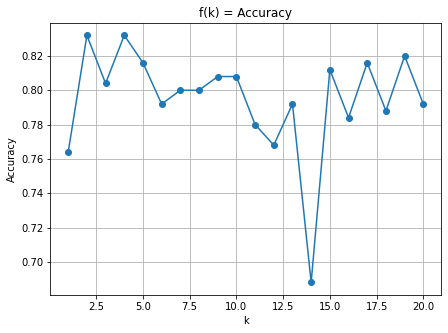

In [1]:
import pandas as pd
import random
import math
import operator
import matplotlib.pyplot as plt
import numpy as np


url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)
split = 0.67


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


accuracy_array = []
for k in range(1,21):
    accuracy = []
    for x in range(1,6):
        neigh = KNeighborsClassifier(n_neighbors = k)
        filename = url
        trainingSet=[]
        testSet=[]
        array = df.to_numpy()
        random.shuffle(array)
        training_len = int(len(array)*split)
        trainingSetY = array[:training_len,4]
        trainingSetX = array[:training_len,:3]
        testSet = array[training_len:,:3]
        testSetY = array[training_len:, 4]
        neigh.fit(trainingSetX, trainingSetY)
        predictions=[]
        predictions = neigh.predict(testSet)
        accuracy.append(accuracy_score(testSetY, predictions))
        if int(len(accuracy)) == 5:
                accuracy_array.append(round(sum(accuracy) / len(accuracy), 3))


k_x = range(1,21)
plt.figure(figsize=(7, 5))
plt.plot(k_x, accuracy_array, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('f(k) = Accuracy')
plt.grid(True)
plt.show()



### Why does accuracy not decrease with increasing amount of k?

The accuracy values do not decrease with increasing k. This is interesting, since in theory the accuracy should decrease, but rather fluctuate randomly between [0.76:0.85]. This could be caused by strong clustering of the data. 

To investigate this, the next section will examine whether the data is clustered. For this, all possible feature combinations are plotted (total = (n!/(r!(n-r)! = 6). The different irises are given different colors, and the different possible feature combinations are plotted with different symbols. The features are irrelevant in this case.

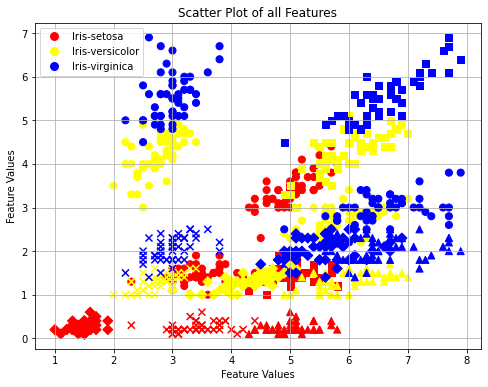

In [6]:
import pandas as pd
import random
import math
import operator
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)
array = df.to_numpy()

numerical_data = np.array([row[:4] for row in array])

class_labels = [row[4] for row in array]  

class_labels_colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'yellow',
    'Iris-virginica': 'blue'
}

scatter_colors = [class_labels_colors[label] for label in class_labels]

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in class_labels_colors.items()]

plt.figure(figsize=(8, 6))
plt.scatter(numerical_data[:, 0], numerical_data[:, 1], c=scatter_colors, label='Feature 1 vs Feature 2', s=50)
plt.scatter(numerical_data[:, 0], numerical_data[:, 2], c=scatter_colors, label='Feature 1 vs Feature 3', s=50, marker='s')
plt.scatter(numerical_data[:, 0], numerical_data[:, 3], c=scatter_colors, label='Feature 1 vs Feature 4', s=50, marker='^')
plt.scatter(numerical_data[:, 1], numerical_data[:, 2], c=scatter_colors, label='Feature 2 vs Feature 3', s=50, marker='o')
plt.scatter(numerical_data[:, 1], numerical_data[:, 3], c=scatter_colors, label='Feature 2 vs Feature 4', s=50, marker='x')
plt.scatter(numerical_data[:, 2], numerical_data[:, 3], c=scatter_colors, label='Feature 3 vs Feature 4', s=50, marker='D')

plt.xlabel('Feature Values')
plt.ylabel('Feature Values')
plt.title('Scatter Plot of all Features')
plt.legend(handles=legend_labels)
plt.grid(True)
plt.show()


### How does data clustering effect the accuracy?

Visualizing the different features, we can see that the possible classifications are highly clustered in their distinctive areas. The fact that the accuracy does not decrease is due to the fundamental reason of the KNN algorithm, since the estimated neighbor is derived from its group of classified neighbors. W
ith this in mind, it could be theorized that increasing k to 50 should decrease the effect of clustering. 

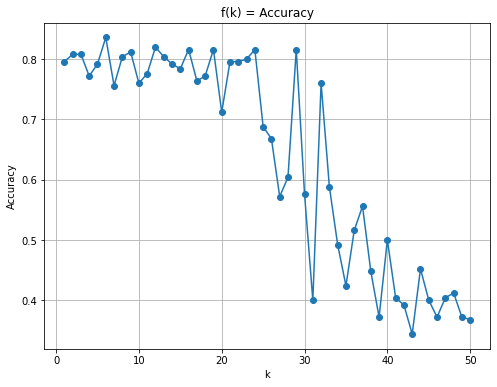

In [11]:
import pandas as pd
import random
import math
import operator
import matplotlib.pyplot as plt
import numpy as np


url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)
split = 0.67


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


accuracy_array = []
for k in range(1,51):
    accuracy = []
    for x in range(1,6):
        neigh = KNeighborsClassifier(n_neighbors = k)
        filename = url
        trainingSet=[]
        testSet=[]
        array = df.to_numpy()
        random.shuffle(array)
        training_len = int(len(array)*split)
        trainingSetY = array[:training_len,4]
        trainingSetX = array[:training_len,:3]
        testSet = array[training_len:,:3]
        testSetY = array[training_len:, 4]
        neigh.fit(trainingSetX, trainingSetY)
        predictions=[]
        predictions = neigh.predict(testSet)
        accuracy.append(accuracy_score(testSetY, predictions))
        if int(len(accuracy)) == 5:
                accuracy_array.append(round(sum(accuracy) / len(accuracy), 3))


k_x = range(1,51)
plt.figure(figsize=(8, 6))
plt.plot(k_x, accuracy_array, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('f(k) = Accuracy')
plt.grid(True)
plt.show()



### Discussion

As theorized, this effect showed up as predicted. This shows the effect of clustering and also the decreasing accuracy. 
This has more to do with the data than the algorithms, so no true fit k is the best. If the amount of data were doubled, the range k where the accuracy drops rapidly would be at twice the amount of k.

Maybe a different metric could be used to rate model performance?

### Summary
- Accuracy for this data set and model remains mostly stable in the range of 75 - 85% and is not dependent on k in the range of 1 - 20.
- Accuracy does not depend on k, but is more related to data structure and clustering.
- Accuracy starts to decrease when k starts to reach 30, this is when K is so big that it is more than the number of samples inside a class.